In [1]:
#!pip install python-louvain

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms
import community
from networkx.algorithms import community as community_methods

In [3]:
#Давайте посмотрим на наш привычный клуб каратистов

G = nx.karate_club_graph()

In [4]:
def split_communities_louvain(G):
    communities = community.best_partition(G)
    return [ communities.get(node) for node in G.nodes() ]

def split_communities_label_propagation(G):
    communities_generator = community_methods.label_propagation_communities(G)
    node_colors = [-1] * len(G.nodes())
    for color, nodes in enumerate(communities_generator):
        for node in nodes:
            node_colors[node] = color
    return node_colors       

C:\Users\roma\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


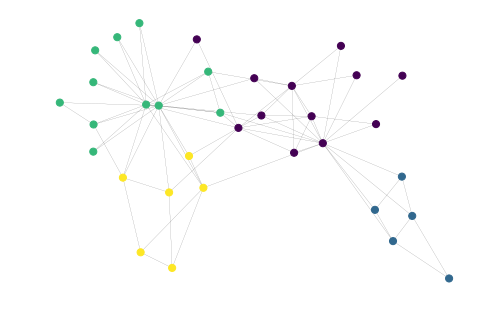

In [5]:
nx.draw_spring(G, node_color=split_communities_louvain(G), node_size=50, width=0.1)

In [6]:
#А вот и сообщества и их можно присоединить к списку ребер и просмотреть, какие характеристики свойственны для 
#каждого сообщества
print(list(community.best_partition(G).values()))

[0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]


In [7]:
#Не забудем про ассортативность. Посчитаем по степени центральности
nx.degree_assortativity_coefficient(G)

-0.47561309768461457

In [8]:
### Домашнее задание и самостоятельная работа. Часть 2. Статистика по сообществам

### Из открытого репозитория открытых сетевых данных https://icon.colorado.edu/#!/networks
### выберете наиболее интересные данные, но с условием того, что информация о графе также содержит и 
### информацию об экзогенных характеристиках.

###Можно взять для примера этот набор данных polbooks=nx.read_gml("polbooks.gml")

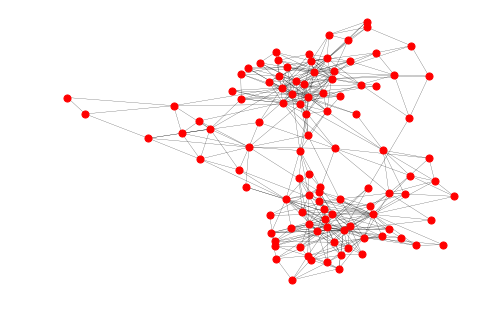

In [9]:
polbooks=nx.read_gml("polbooks.gml")
nx.draw(polbooks, node_size=50, width=0.2)

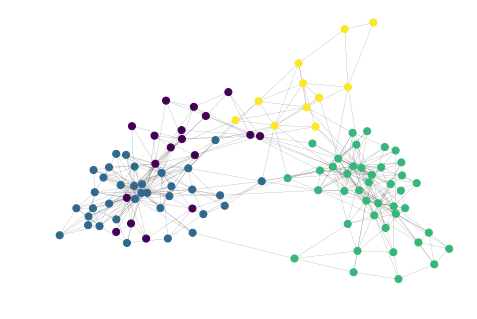

In [10]:
nx.draw_spring(polbooks, node_color=split_communities_louvain(polbooks), node_size=50, width=0.1)

In [11]:
### Загрузите набор данных

### Выделите ключевые сообщества и 
### просмотрите, насколько выделение сообществ соотносится с экзогенными характеристиками?

### Рассчитайте коэффициент ассортативности по степени центральности и по экзогенным характеристикам.

In [12]:
import json

In [13]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return nx.readwrite.json_graph.node_link_graph(js_graph)

In [14]:
SW = read_json_file('starwars-episode-5-interactions-allCharacters.json')

In [15]:
dict(SW.nodes.data('name'))

{0: 'R2-D2',
 1: 'CHEWBACCA',
 2: 'LUKE',
 3: 'HAN',
 4: 'RIEEKAN',
 5: 'LEIA',
 6: 'C-3PO',
 7: 'DERLIN',
 8: 'OBI-WAN',
 9: 'ZEV',
 10: 'PIETT',
 11: 'OZZEL',
 12: 'DARTH VADER',
 13: 'DACK',
 14: 'WEDGE',
 15: 'JANSON',
 16: 'NEEDA',
 17: 'EMPEROR',
 18: 'YODA',
 19: 'BOBA FETT',
 20: 'LANDO'}

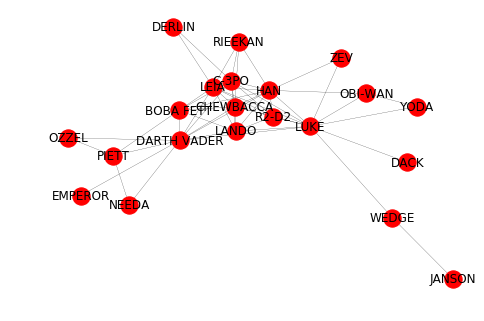

In [16]:
nx.draw(SW, width=0.2, with_labels=True, labels=dict(SW.nodes.data('name')))

In [17]:
len(split_communities_label_propagation(SW))

21

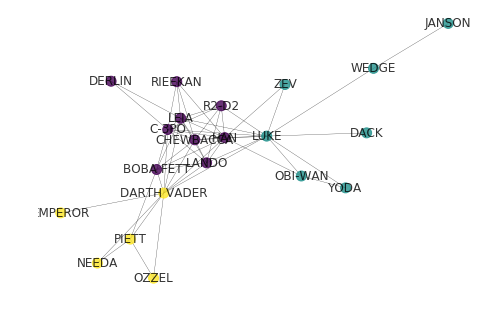

In [18]:
nx.draw(SW, node_color=split_communities_louvain(SW), node_size=100, width=0.3,
        alpha=0.8, horizontalalignment='center',
        with_labels=True, labels=dict(SW.nodes.data('name')))

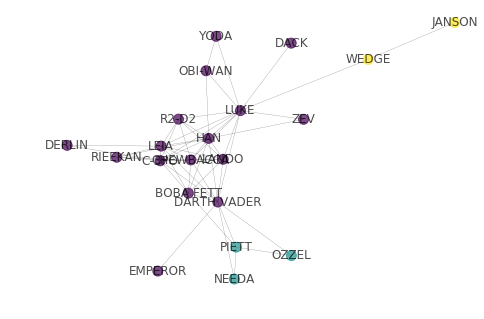

In [19]:
nx.draw(SW, node_color=split_communities_label_propagation(SW), node_size=100, width=0.2,
        alpha=0.7,
        with_labels=True, labels=dict(SW.nodes.data('name')))

In [20]:
nx.degree_assortativity_coefficient(SW)

-0.15183246073298476